In [81]:
import numpy
import pandas as pd
import yfinance as yf
from datetime import date


In [82]:
df = yf.download("SPY", start="2021-01-1", end="2021-09-1", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [83]:
df['ClosePrev'] = df['Close'].shift(1)
df

,Open,High,Low,Close,Adj Close,Volume,ClosePrev
Date,,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,366.387390,110210800,NaN
2021-01-05,368.100006,372.500000,368.049988,371.329987,368.910828,66426200,368.790009
2021-01-06,369.709991,376.980011,369.119995,373.549988,371.116394,107997700,371.329987
2021-01-07,376.100006,379.899994,375.910004,379.100006,376.630249,68766800,373.549988
2021-01-08,380.589996,381.489990,377.100006,381.260010,378.776184,71677200,379.100006
...,...,...,...,...,...,...,...
2021-08-16,444.529999,447.109985,442.869995,446.970001,446.970001,73740000,445.920013
2021-08-17,444.239990,444.959991,440.850006,444.040009,444.040009,92673900,446.970001
2021-08-18,442.959991,444.630005,438.920013,439.179993,439.179993,89351900,444.040009


In [84]:
df['todaysChange'] = 100*((df['Close'] - df['ClosePrev']))/df['ClosePrev']
df['nextDayChange'] = df['todaysChange'].shift(-1)


In [85]:
# df[['Volume', '% Change', 'shiftedChange']].to_csv("tslaChange.csv")

In [86]:
df

,Open,High,Low,Close,Adj Close,Volume,ClosePrev,todaysChange,nextDayChange
Date,,,,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,366.387390,110210800,NaN,NaN,0.688733
2021-01-05,368.100006,372.500000,368.049988,371.329987,368.910828,66426200,368.790009,0.688733,0.597851
2021-01-06,369.709991,376.980011,369.119995,373.549988,371.116394,107997700,371.329987,0.597851,1.485750
2021-01-07,376.100006,379.899994,375.910004,379.100006,376.630249,68766800,373.549988,1.485750,0.569771
2021-01-08,380.589996,381.489990,377.100006,381.260010,378.776184,71677200,379.100006,0.569771,-0.674083
...,...,...,...,...,...,...,...,...,...
2021-08-16,444.529999,447.109985,442.869995,446.970001,446.970001,73740000,445.920013,0.235466,-0.655523
2021-08-17,444.239990,444.959991,440.850006,444.040009,444.040009,92673900,446.970001,-0.655523,-1.094500
2021-08-18,442.959991,444.630005,438.920013,439.179993,439.179993,89351900,444.040009,-1.094500,0.154832


In [87]:
df.loc[(df['nextDayChange'] > 0) & (df['todaysChange'] < 0), 'signal'] = 'BUY'
df.loc[(df['nextDayChange'] < 0) & (df['todaysChange'] < 0), 'signal'] = 'SELL'
df.loc[(df['nextDayChange'] > 0) & (df['todaysChange'] > 0), 'signal'] = 'HOLD'
df.loc[(df['nextDayChange'] < 0) & (df['todaysChange'] > 0), 'signal'] = 'SELL'


In [88]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,ClosePrev,todaysChange,nextDayChange,signal
Date,,,,,,,,,,
2021-07-26,439.309998,441.029999,439.260010,441.019989,441.019989,43719200,439.940002,0.245485,-0.455757,SELL
2021-07-27,439.910004,439.940002,435.989990,439.010010,439.010010,67397100,441.019989,-0.455757,-0.041007,SELL
2021-07-28,439.679993,440.299988,437.309998,438.829987,438.829987,52472400,439.010010,-0.041007,0.414741,BUY
2021-07-29,439.820007,441.799988,439.809998,440.649994,440.649994,47435300,438.829987,0.414741,-0.485643,SELL
2021-07-30,437.910004,440.059998,437.769989,438.510010,438.510010,68890600,440.649994,-0.485643,-0.209804,SELL
2021-08-02,440.339996,440.929993,437.209991,437.589996,437.589996,58783300,438.510010,-0.209804,0.813546,BUY
2021-08-03,438.440002,441.279999,436.100006,441.149994,441.149994,58053900,437.589996,0.813546,-0.491892,SELL
2021-08-04,439.779999,441.119995,438.730011,438.980011,438.980011,46732200,441.149994,-0.491892,0.633286,BUY
2021-08-05,440.220001,441.850006,439.880005,441.760010,441.760010,38969700,438.980011,0.633286,0.165244,HOLD


In [89]:
training_df = df[[ 'todaysChange', 'Close', 'signal']]

In [90]:
training_df

,todaysChange,Close,signal
Date,,,
2021-01-04,NaN,368.790009,NaN
2021-01-05,0.688733,371.329987,HOLD
2021-01-06,0.597851,373.549988,HOLD
2021-01-07,1.485750,379.100006,HOLD
2021-01-08,0.569771,381.260010,SELL
...,...,...,...
2021-08-16,0.235466,446.970001,SELL
2021-08-17,-0.655523,444.040009,SELL
2021-08-18,-1.094500,439.179993,BUY


In [91]:
training_df = training_df.dropna(thresh=3)

In [92]:
training_df.tail(30)

,todaysChange,Close,signal
Date,,,
2021-07-09,1.067478,435.519989,HOLD
2021-07-12,0.358192,437.079987,SELL
2021-07-13,-0.340896,435.589996,BUY
2021-07-14,0.149221,436.239990,SELL
2021-07-15,-0.341553,434.750000,SELL
2021-07-16,-0.784360,431.339996,SELL
2021-07-19,-1.476792,424.970001,BUY
2021-07-20,1.433041,431.059998,HOLD
2021-07-21,0.809630,434.549988,HOLD


In [93]:
from sklearn import tree
from sklearn import linear_model


clf = linear_model.LogisticRegression()
clf = clf.fit(training_df[[ 'todaysChange']], training_df['signal'])

In [94]:
clf.predict([[5.096987]])

array(['HOLD'], dtype=object)

BUY 422.1099853515625 -422.1099853515625
SELL 421.9700012207031 -0.139984130859375
BUY 414.9200134277344 -415.05999755859375
SELL 423.1099853515625 8.04998779296875
BUY 430.9200134277344 -422.8700256347656
SELL 437.0799865722656 14.2099609375
BUY 431.3399963378906 -417.1300354003906
BUY 424.9700012207031 -842.1000366210938
SELL 435.4599914550781 28.8199462890625
BUY 438.9800109863281 -410.1600646972656
SELL 441.760009765625 31.599945068359375
BUY 444.0400085449219 -412.4400634765625


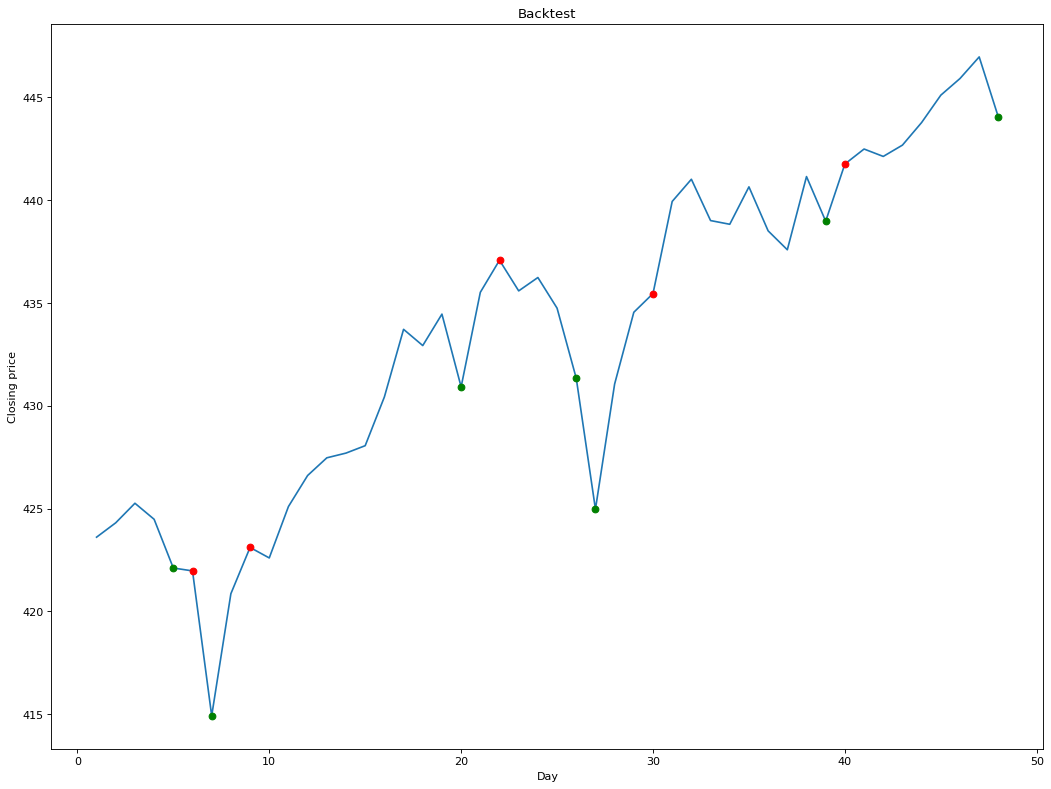

31.599945068359375

In [95]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)


signals = []
prices = []
days = []

def plot_backtest(signals, prices, days):
#     print(prices,days)
    plt.plot(days,prices)
    for i in range(len(prices)):
#         print(signals[i])
        if signals[i] == 'BUY':
            plt.plot(days[i], prices[i],'go')
        if signals[i] == 'SELL':
            plt.plot(days[i], prices[i],'ro')
        
    plt.title('Backtest')
    plt.xlabel('Day')
    plt.ylabel('Closing price')    
    
    plt.show()

def backtest():
    num_stocks = 0
    prof = 0
    cnt = 1
    for i in range(50,2,-1):
        modified_df = training_df.drop(training_df.tail(i).index,inplace=False) # drop last n rows
        actual = training_df.tail(i)
        actual = actual.head(1)
#         print(modified_df)
#         return
#         print(actual)
        clf = linear_model.LogisticRegression()
        clf = clf.fit(modified_df[['todaysChange']], modified_df['signal'])
        prediction = clf.predict(actual[['todaysChange']])
#         return
        if prediction[0] == 'BUY':
            prof -= actual['Close'].iloc[0]
            num_stocks += 1
            print('BUY', actual['Close'].iloc[0], prof)
            signals.append('BUY')
            prices.append(actual['Close'].iloc[0])
        elif prediction[0] == 'SELL' and num_stocks > 0:
            prof += (actual['Close'].iloc[0])*num_stocks
            num_stocks = 0
            print('SELL', actual['Close'].iloc[0], prof)
            signals.append('SELL')
            prices.append(actual['Close'].iloc[0])
        else:
            signals.append('NA')
            prices.append(actual['Close'].iloc[0])
        days.append(cnt)
        cnt += 1
    if num_stocks > 0:
#         print(actual['Close'].iloc[0])
        prof += (actual['Close'].iloc[0])*num_stocks

#     print(signals)
#     print(prices)
    plot_backtest(signals, prices, days)

#         if actual['signal'].iloc[0] == prediction[0]:
#             cnt += 1
            
    return prof


backtest()